# Clustering on worms dataset
Filippo Fantinato 2041620

Here you can find the notebook where I experienced with k-means on worms dataset.

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering 

import numpy as np
import matplotlib.pyplot as plt

Let's download and unzip the dataset.

In [35]:
!wget http://cs.uef.fi/sipu/datasets/worms.zip
!unzip worms.zip

--2022-12-28 13:38:18--  http://cs.uef.fi/sipu/datasets/worms.zip
Resolving cs.uef.fi (cs.uef.fi)... 193.167.239.10
Connecting to cs.uef.fi (cs.uef.fi)|193.167.239.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20850658 (20M) [application/zip]
Saving to: ‘worms.zip.2’

worms.zip.2         100%[===================>]  19.88M  8.81MB/s    in 2.3s    

2022-12-28 13:38:21 (8.81 MB/s) - ‘worms.zip.2’ saved [20850658/20850658]

Archive:  worms.zip
replace worms/worms_64d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: worms/worms_64d.txt     
  inflating: worms/gen_2d_worms.m    
  inflating: worms/README.txt        
  inflating: worms/worms_2d.png      
  inflating: worms/gen_high_dim_worms.m  
  inflating: worms/worms_64d-gt.pa   
  inflating: worms/worms_2d-gt.pa    
  inflating: worms/worms_2d.txt      


## Preprocessing

Let's read the dataset and split it into train and test ones.

In [36]:
w = open('worms/worms_2d.txt', 'r')
worms2d = []
for worm in w.readlines():
  worms2d.append(worm.split())

len(worms2d)

105600

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = StandardScaler().fit_transform(worms2d)
X_train, X_test = train_test_split(X, test_size = 0.20, random_state = 42)

## KMeans

Via the [elbow method](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans) I discovered the best number of clusters, which is 4 for this specific dataset.

1 : 168961.50494921207
2 : 106324.29533372403
3 : 62245.58922350264
4 : 45339.988062527205
5 : 36850.89322578481
6 : 30696.254661981235
7 : 26339.732877211398
8 : 22864.561395212622
9 : 20786.07424844907


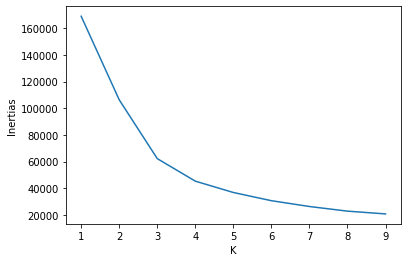

In [42]:
inertias = []
ks = range(1,10)
for k in ks:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(X_train)
  inertias.append(kmeans.inertia_)

for k in ks:
  print(k, ':' , inertias[k-1])

plt.plot(ks, inertias)
plt.xlabel('K')
plt.ylabel('Inertias')
plt.show()

Finally, I can compute the clusters on the test dataset and plot them.

In [44]:
kmeans= KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_labels= kmeans.fit_predict(X_test)
centroids = kmeans.cluster_centers_

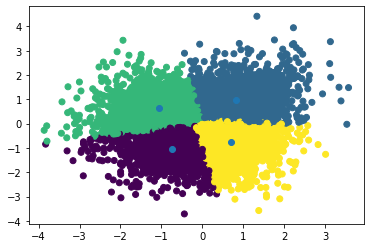

In [45]:
plt.scatter(x=X_test[:,0], y=X_test[:,1], c=kmeans_labels)
plt.scatter(x=centroids[:,0], y=centroids[:,1], marker="o")
plt.show()